#### 1. Given a undirected graph 

A graph has a edge list as (0, 1), (1, 2), (2, 3), (1, 3),(1,8), (2,8),(0,8), (0, 7), (0, 6), (4, 0), (4, 5), (5, 6), (5, 7).

1. Caculate the The modularity of a graph with partition = [{1, 2, 3, 8},{4, 5, 6, 7,0}] ?

2. Find maximum clique in the graph. ?


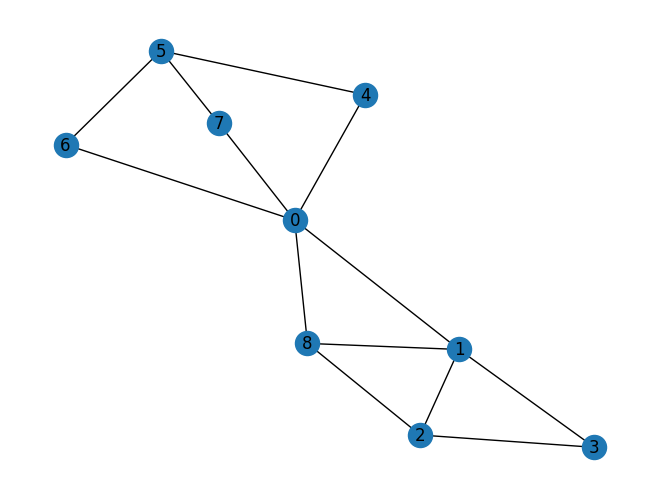

In [1]:
import networkx as nx
G = nx.Graph()


G.add_edges_from([(0, 1), (1, 2), (2, 3), (1, 3),(1,8), (2,8),(0,8), (0, 7), (0, 6), (4, 0), (4, 5), (5, 6), (5, 7)])

nx.draw(G, with_labels=True)

In [2]:
partition = [
    {1, 2, 3, 8},
    {4, 5, 6, 7,0}]

In [3]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [4]:
modularity(G, partition)


0.3431952662721894

In [5]:
cliques = list(nx.find_cliques(G))
cliques
# Find maximum clique
max_clique = max(cliques, key=len)
max_clique

[0, 1, 8]

### 2. Load friend network from edge-list file "Karate_edgelist" and compute measurements: 

Common neighbors, Jaccard’s coefficient, Adamic-Adar, Preferential attachment (PA), and SimRank 


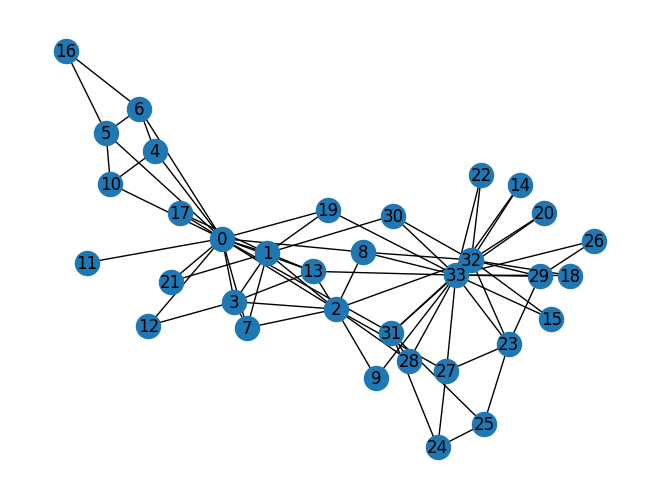

In [13]:
karate_graph = nx.read_edgelist('data/Karate_edgelist.txt')
nx.draw(karate_graph,with_labels = True)

In [29]:
node_list =  [(0, 1)]

In [30]:
# Function to get list of common neighbors
def get_common_neighbors(G, node_list):
    cn_list = G.nodes
    node_pairs = [(a, b) for idx, a in enumerate(node_list) for b in node_list[idx + 1:]]
    
    for pair in node_pairs:
        cn_in_node_pair = sorted(nx.common_neighbors(G, pair[0], pair[1]))
        cn_list = common_values(cn_list, cn_in_node_pair)

    return cn_list


In [31]:
def draw_coefficient_edges(G, preds):
    edge_labels = {}
    target_list = []

    for u, v, p in preds:
        edge_labels[(u, v)] = f"{p:.3f}"
        target_list.append(u)
        target_list.append(v)
        
    pos = nx.spring_layout(G)

    nx.draw(G, pos, 
            node_size=1000,
            node_color='#74b9ff',
            with_labels=True,
            font_size = 20)
    # Mark target nodes as green color
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=target_list,
                           node_size=1000,
                           node_color='r')
    nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red'
    )

#### a. Common neighbors

In [32]:
cn_list = get_common_neighbors(G, node_list)
cn_list

NodeView((0, 1, 2, 3, 8, 7, 6, 4, 5))

#### b. Preferential attachment (PA)

In [37]:
preds = nx.preferential_attachment(G, node_list)

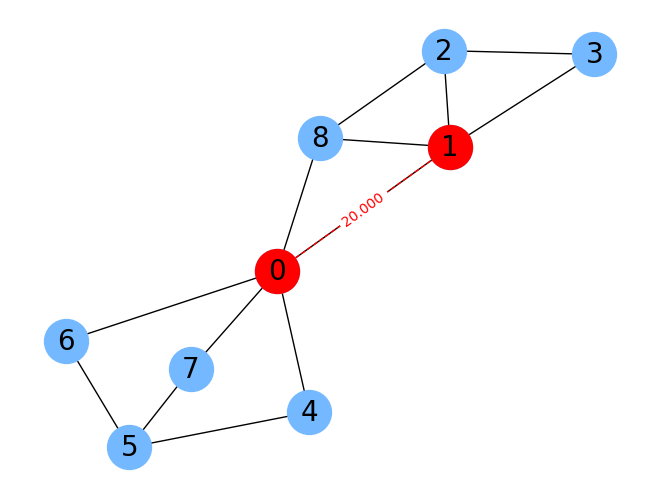

In [38]:
draw_coefficient_edges(G, preds) 

#### c. Adamic-Adar

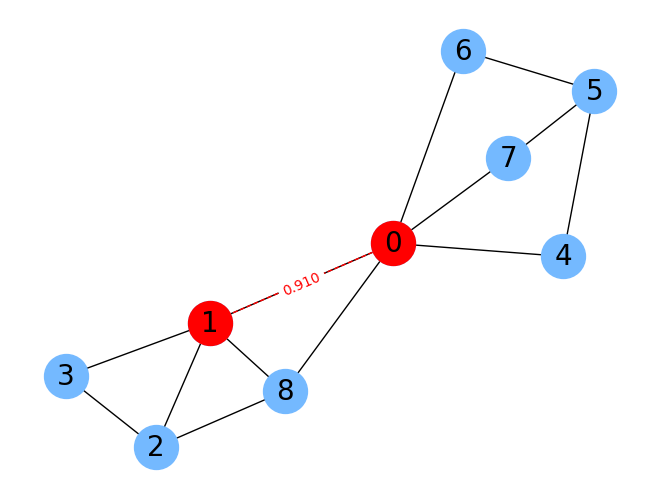

In [34]:
preds = nx.adamic_adar_index(G, node_list)
draw_coefficient_edges(G, preds)  

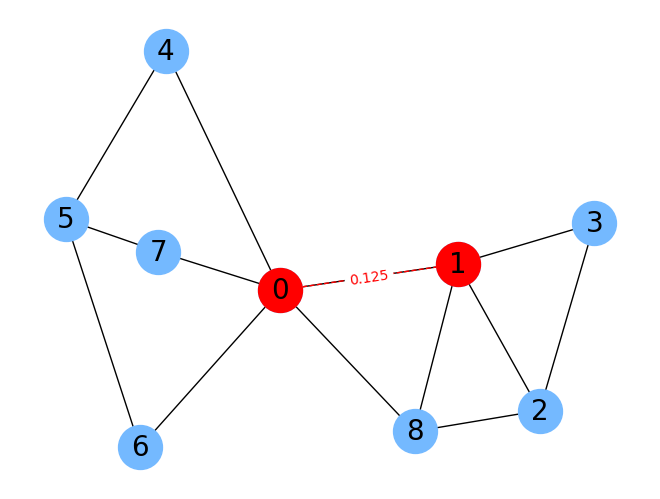

In [35]:
preds = nx.jaccard_coefficient(G, node_list)
draw_coefficient_edges(G, preds)  

#### d. Sim Rank

In [43]:
# Function to calculate SimRank similarity of a list of node pairs
def calculate_simrank_similarity(G, node_list):
    return ((source, target, nx.simrank_similarity(G, source, target)) for source, target in node_list)

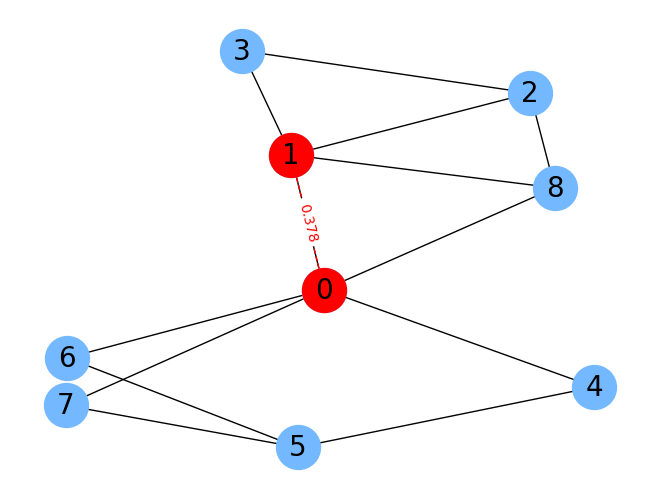

In [45]:
preds = calculate_simrank_similarity(G, node_list)

draw_coefficient_edges(G, preds)  

#### e. Jaccard’s coefficient

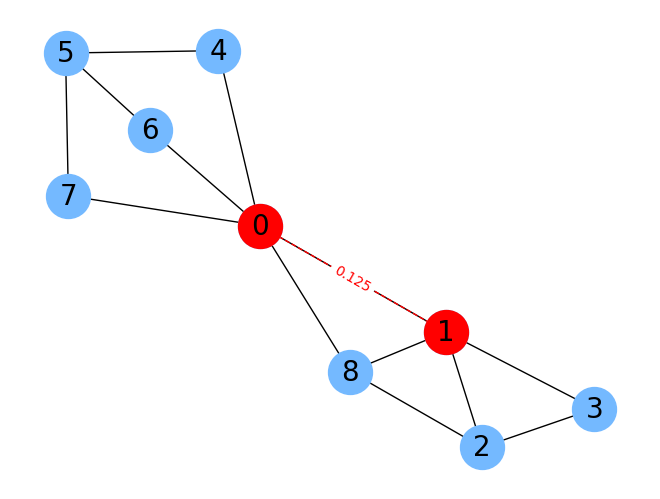

In [46]:
preds = nx.jaccard_coefficient(G, node_list)
draw_coefficient_edges(G, preds)